**Problem Statement:**
In a competitive market like the restaurent industry, understanding the factors that influence the business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship between user engagement (reviews, tip and check_ins) and business success metrics(review count, ratings) fro restaurent.

**Reasearch objectives:** 

1. **Quantify the co-relation between user engagemnt( reviews, tips, check-ins) and review count/average star rating:** This will help us determine if rstaurents with higher user engagement experience a corresponding increase in reviews and ratings.

2. **Analyse the impact of sentiment on review count and average star rating:** We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.

3. **Time trends in user engagements:** we will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activites

**Hypothesis Testing**1.  Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants
2.  Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants
3. 
Consistent engagement over time is positively associated with sustained business success for restaurants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table'", conn)

In [4]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [5]:
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))
    

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


**Data Analysis**

In [6]:
pd.read_sql_query('select count(*) from business',conn)

,count(*)
0,150346


In [7]:
business_id = pd.read_sql_query("select business_id, review_count, stars from business where lower(categories) like '%restaurant%' and is_open = 1",conn)

What is the descriptive stats for review count and star rating of the businesses?
--avg, min value, max value, median

In [8]:
pd.read_sql_query(f"""
select avg(review_count) as avg_review, min(review_count) as min_review, max(review_count) as max_review,
(select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review,


avg(stars) as avg_stars, min(stars) as min_stars, max(stars) as max_stars,
(select stars from business order by stars limit 1 offset (select count(*) from business)/2) as median_star 
from business where business_id in {tuple(business_id['business_id'])}""",conn).T 


,0
avg_review,104.097789
min_review,5.000000
max_review,7568.000000
median_review,15.000000
avg_stars,3.523969
min_stars,1.000000
max_stars,5.000000
median_star,3.500000


Remove outliers as they alter analysis quality

In [9]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound)&(df[col] <= upper_bound)]
    return df

In [10]:
business_id = remove_outliers(business_id, 'review_count' )

In [11]:
pd.read_sql_query(f"""
select avg(review_count) as avg_review, min(review_count) as min_review, max(review_count) as max_review,
(select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review,


avg(stars) as avg_stars, min(stars) as min_stars, max(stars) as max_stars,
(select stars from business order by stars limit 1 offset (select count(*) from business)/2) as median_star 
from business where business_id in {tuple(business_id['business_id'])}""",conn).T 


,0
avg_review,55.975426
min_review,5.000000
max_review,248.000000
median_review,15.000000
avg_stars,3.477281
min_stars,1.000000
max_stars,5.000000
median_star,3.500000


In [12]:
# which restaurent has highest number of reviews?
pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])} group by name order by review_count desc limit 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [13]:
# which restaurent has highest ratings?
pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])} group by name order by avg_rating desc limit 10""",conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [14]:
# Do restaurnts with higher engagements tend to have higher ratings?
pd.read_sql_query("""select business_id, sum(length(date)-length(replace(date, ',',''))+1) as checkin_count
from checkin group by business_id""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [15]:
pd.read_sql_query("""select business_id, count(*) as tip_count
from tip group by business_id""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [16]:
review_count_df = pd.read_sql_query(f""" select total.avg_rating as rating,
avg(total.review_count) as avg_review_count,
avg(total.checkin_count) as avg_checkin_count,
avg(total.tip_count) as avg_tip_count
from
(select 
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    sum(length(cc.date)-length(replace(cc.date,',',''))+1) as checkin_count,
    sum(tip.tip_count) as tip_count
from 
    business b
left join
    checkin cc on b.business_id=cc.business_id
left join
    (select business_id, count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id = tip.business_id
where
    b.business_id in {tuple(business_id['business_id'])}
group by
    b.business_id) as total
    
group by total.avg_rating

""", conn)

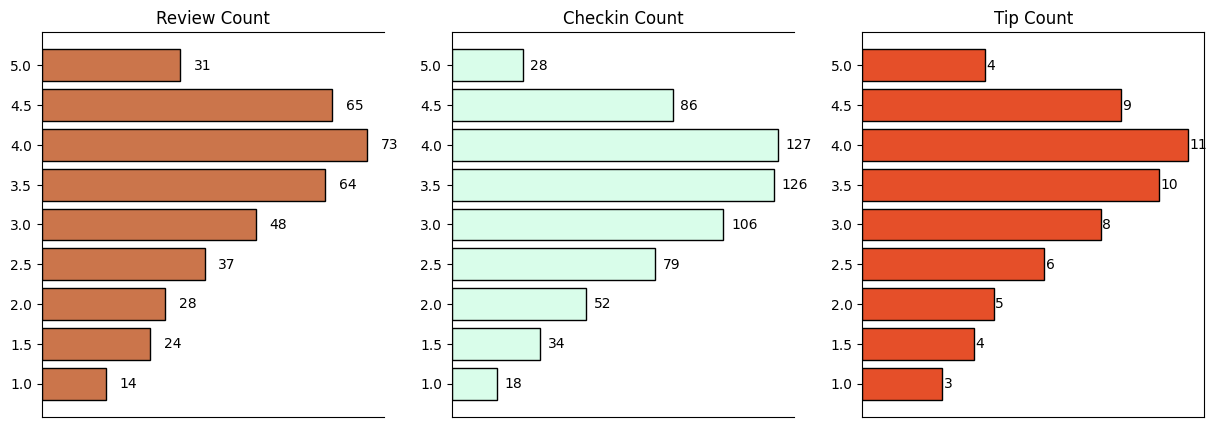

In [17]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines ['right'].set_visible (False)
for i, value in enumerate (review_count_df ['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')


plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_checkin_count'], edgecolor = 'k', color = '#23F5862C')
plt.gca().spines ['right'].set_visible (False)
for i, value in enumerate (review_count_df ['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_tip_count'], edgecolor = 'k', color='#E54F29')
for i, value in enumerate (review_count_df ['avg_tip_count']):
    plt.text(value+0.05, i, str(round (value)), color='black', va='center')
plt.xticks([])
plt.show()

In [18]:
#Is there a co relation between number of reviews, checkin, tips for a business?

engagement_df = pd.read_sql_query(f""" select 
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    sum(length(cc.date)-length(replace(cc.date,',',''))+1) as checkin_count,
    sum(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 Then 'High-Rated' Else 'Low-Rated' END) as category 
from 
    business b
left join
    checkin cc on b.business_id=cc.business_id
left join
    (select business_id, count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id = tip.business_id
where
    b.business_id in {tuple(business_id['business_id'])}
group by
    b.business_id
""", conn).dropna()


In [19]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


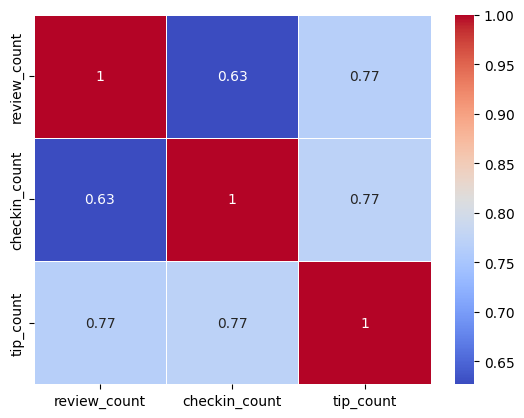

In [20]:
corr_matrix = engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [21]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses? 
pd.read_sql_query(f"""SELECT b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH (REPLACE(cc.date, ',', ''))+ 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 Then 'High-Rated' Else 'Low-Rated' END) as category 
from
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id 
    WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", conn).dropna()

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,High-Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,Low-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,Low-Rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,Low-Rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,Low-Rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,Low-Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,High-Rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,High-Rated


In [22]:
# Differenece in engagement in between High_rated and Low_rated businesses
engagement_df.groupby("category")[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


In [23]:
#Function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating']* np.log(row['review_count']+1)
        success_score.append(score)
    return success_score

In [24]:
# How to success metric vary according to different locations?
city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, avg(stars) as avg_rating, sum(review_count) as review_count,
count(*) as restaurent_count
from business
where business_id in {tuple(business_id['business_id'])}
group by state, city
order by review_count desc
limit 10
""", conn)

city_df['success_score'] = calculate_success_metric(city_df)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurent_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [25]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)
# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())
# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)
# Add color scale to the map
m.add_child(color_scale)

In [26]:
# Are there any patterns in user engagement compared with successfull and low successfull businesses over time?
#Are there any seasonal changes in trends in user_engagement?
high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year
;""", conn)


low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year
;""", conn)

In [27]:
time_rating = pd.read_sql_query(f"""select strftime('%m-%Y', date) as month_year, avg(stars) as avg_rating
from review
where business_id in {tuple(business_id['business_id'])}
group by month_year
order by month_year""", conn)

In [28]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [29]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating=time_rating[time_rating['month_year']> '2017']
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']


In [33]:
high_rated_engagement['month_year']

20    2017-02-01
32    2017-03-01
45    2017-04-01
58    2017-05-01
71    2017-06-01
84    2017-07-01
97    2017-08-01
110   2017-09-01
123   2017-10-01
136   2017-11-01
149   2017-12-01
8     2018-01-01
21    2018-02-01
33    2018-03-01
46    2018-04-01
59    2018-05-01
72    2018-06-01
85    2018-07-01
98    2018-08-01
111   2018-09-01
124   2018-10-01
137   2018-11-01
150   2018-12-01
9     2019-01-01
22    2019-02-01
34    2019-03-01
47    2019-04-01
60    2019-05-01
73    2019-06-01
86    2019-07-01
99    2019-08-01
112   2019-09-01
125   2019-10-01
138   2019-11-01
151   2019-12-01
10    2020-01-01
23    2020-02-01
35    2020-03-01
48    2020-04-01
61    2020-05-01
74    2020-06-01
87    2020-07-01
100   2020-08-01
113   2020-09-01
126   2020-10-01
139   2020-11-01
152   2020-12-01
11    2021-01-01
24    2021-02-01
36    2021-03-01
49    2021-04-01
62    2021-05-01
75    2021-06-01
88    2021-07-01
101   2021-08-01
114   2021-09-01
127   2021-10-01
140   2021-11-01
153   2021-12-

In [30]:
high_rated_engagement['avg rating'] = time_rating['avg_rating'].values

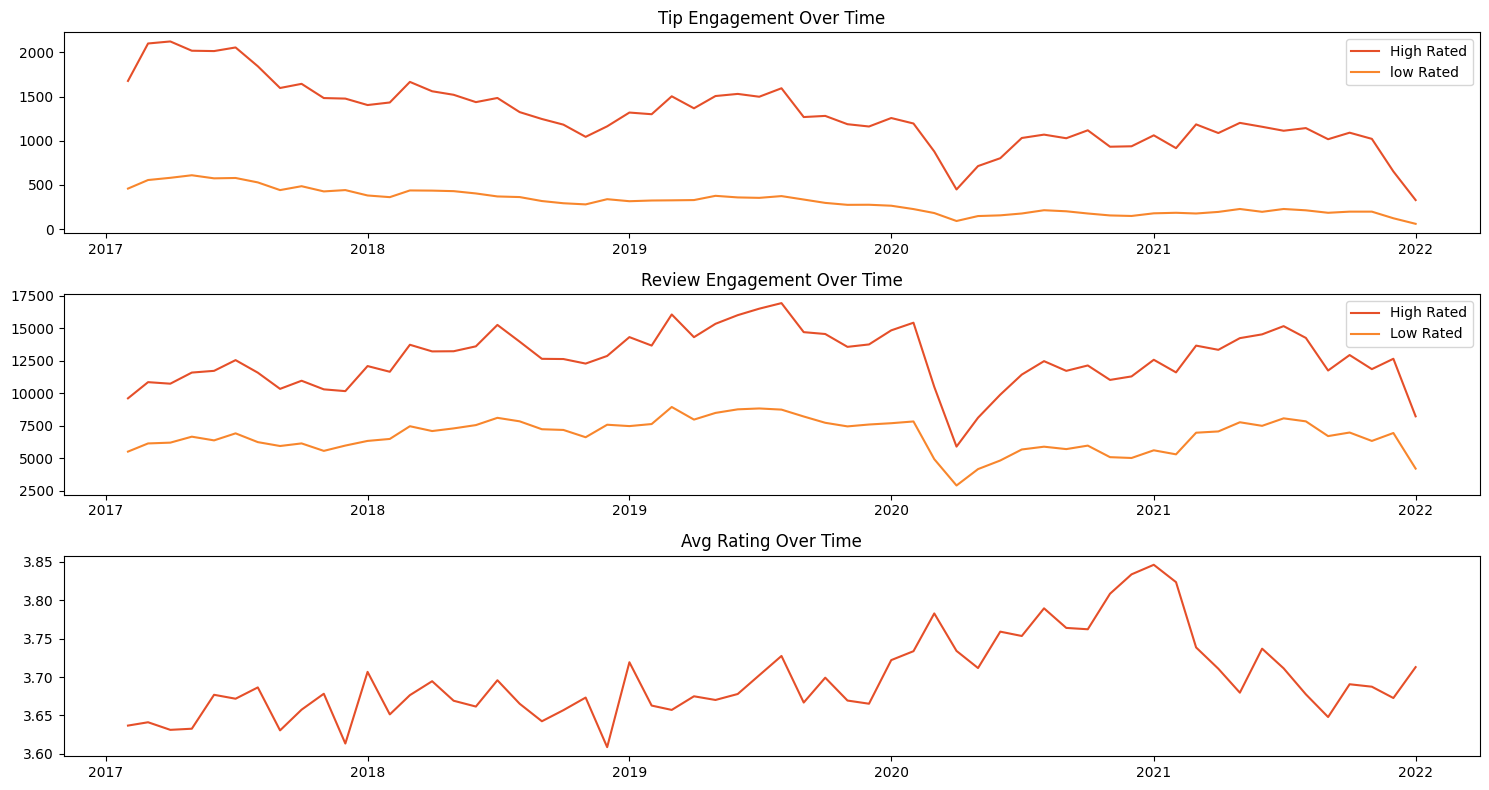

In [31]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [34]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

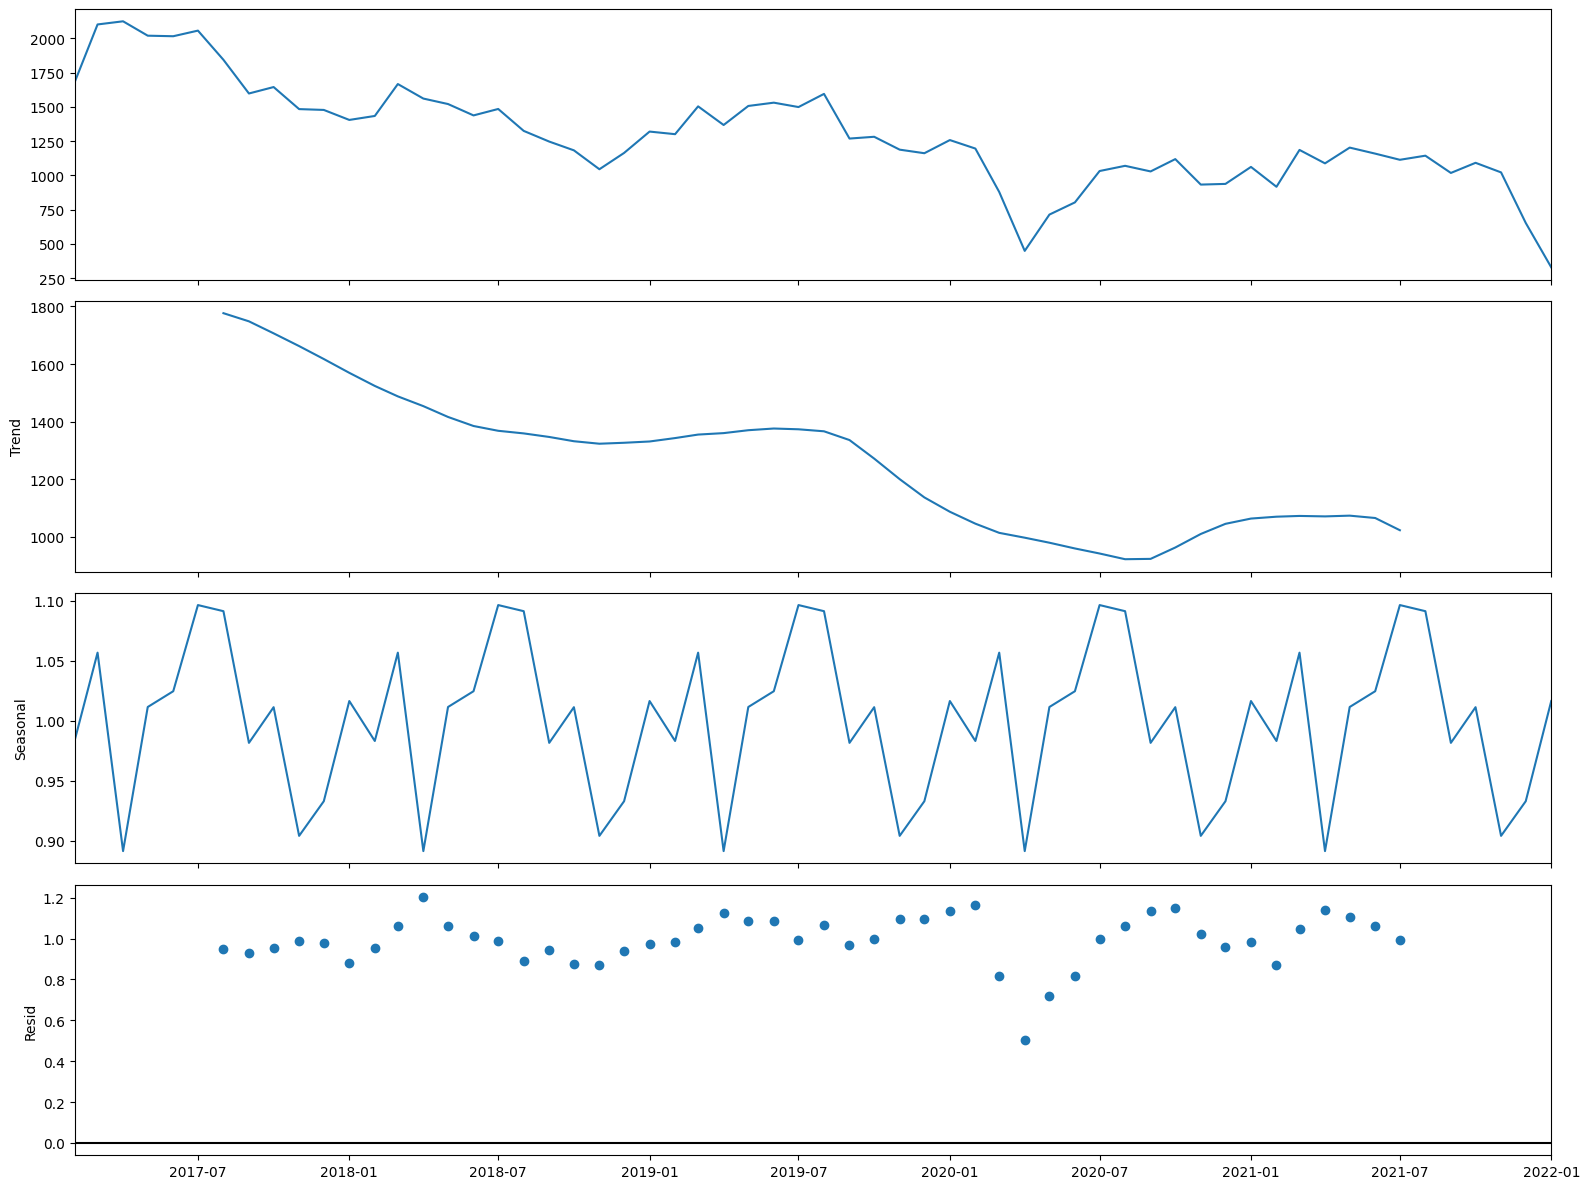

In [36]:

from statsmodels.tsa.seasonal import seasonal_decompose 
multiplicative_decomposition = seasonal_decompose(tip_high_rated,model='multiplicative', period=12)
plt.rcParams.update({'figure.figsize': (16,12)}) 
multiplicative_decomposition.plot()
plt.show()


In [37]:
#How does the sentiment of reviews and tips(usefull, funny, cool) corelate with success metrics of the restaurents??

In [43]:
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,

SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id
WHERE b.business_id IN {tuple (business_id ['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""", conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [44]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

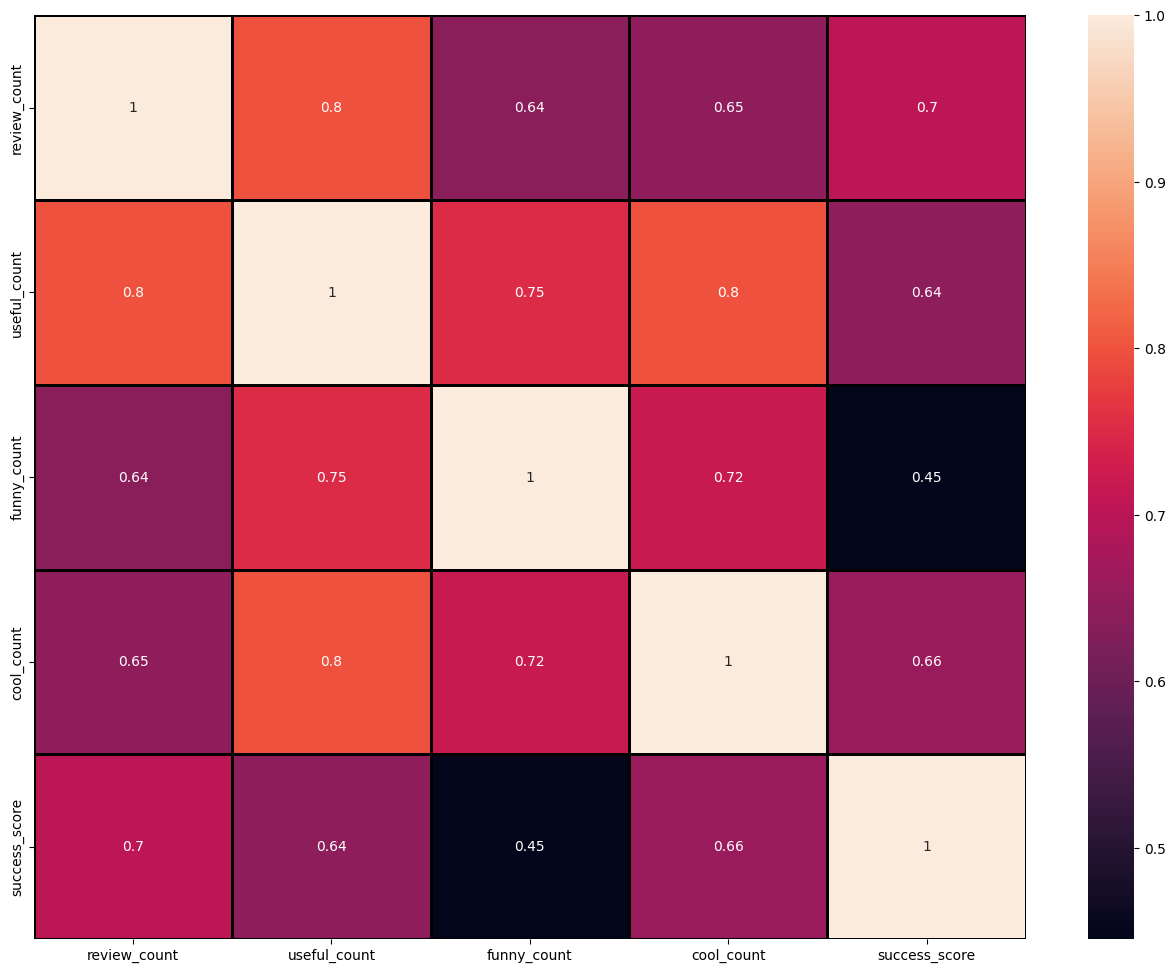

In [50]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),annot = True, linecolor = 'black', linewidth = 1)
plt.show()

In [59]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""SELECT
                             elite,
COUNT(*) AS num_users,
SUM(review_count) AS total_review_count
FROM

(SELECT CASE
WHEN elite = '' THEN 'Not Elite'
ELSE 'Elite'
END AS elite,
u.review_count
FROM user u) AS user_elite
GROUP BY
elite;""",
conn)

In [60]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


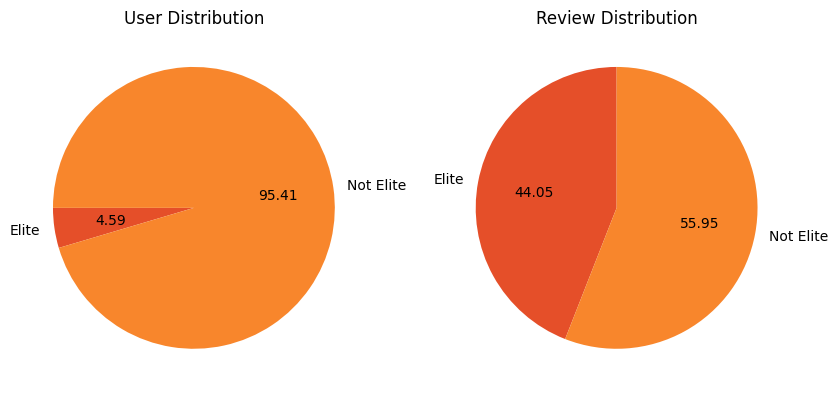

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct='%.2f', startangle =180, colors =['#E54F29', '#F8862C'])
plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels =elite_df['elite'], autopct='%.2f', startangle =90, colors =['#E54F29', '#F8862C'])
plt.show()

In [65]:
#What are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H', date) as integer)
as hour,
COUNT(*) AS review_count
FROM
review
GROUP BY
hour;
""",conn)
tip_engagement=pd.read_sql_query("""SELECT
cast (strftime('%H', date) as integer)
as hour,
COUNT(*) AS tip_count
FROM
tip
GROUP BY
hour;
""", conn)

checkin= pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()


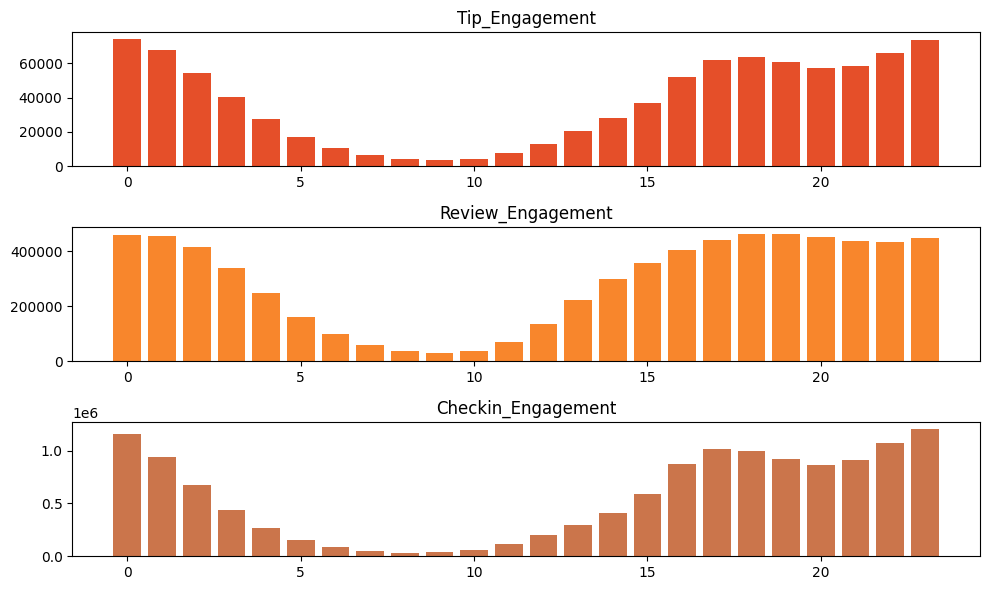

In [66]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip_Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review_Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color = '#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin_Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#CB754B')
plt.tight_layout()
plt.show()